In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
personal_data = pd.read_csv("customer_data.csv")
campaign_data = pd.read_csv("campaign_data.csv")
campaign_data[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].astype(int)
campaign_data["Total Accept"] = campaign_data[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].sum(axis=1)
join = personal_data.merge(campaign_data, on = 'index', how = "inner")
join

,index,Income,Kidhome,Teenhome,Recency,Complain,Age,Customer_Days,marital_Divorced,marital_Married,...,education_Graduation,education_Master,education_PhD,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total Accept
0,0,58138.0,0,0,58,0,63,2822,0,0,...,1,0,0,0,0,0,0,0,1,1
1,1,46344.0,1,1,38,0,66,2272,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,71613.0,0,0,26,0,55,2471,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,26646.0,1,0,26,0,36,2298,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,58293.0,1,0,94,0,39,2320,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,0,53,2540,0,1,...,1,0,0,0,0,0,0,0,0,0
2201,2201,64014.0,2,1,56,0,74,2178,0,0,...,0,0,1,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,0,39,2314,1,0,...,1,0,0,0,0,0,1,0,0,1
2203,2203,69245.0,0,1,8,0,64,2315,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
personal_data_column = personal_data.drop(columns=["index", 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']).columns.to_list()
campaign_data_column = campaign_data.drop(columns="index").columns.to_list()
campaign_data_column

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response',
 'Total Accept']

In [4]:

correlation_matrix = join[personal_data_column + campaign_data_column].corr()
correlation_with_campaigns = correlation_matrix.loc[personal_data_column, campaign_data_column]
# correlation_with_campaigns["Average campaign"] = correlation_with_campaigns[['AcceptedCmp3',
#  'AcceptedCmp4',
#  'AcceptedCmp5',
#  'AcceptedCmp1',
#  'AcceptedCmp2',
#  'Response']].mean(axis = 1)
correlation_with_campaigns.sort_values(by = "Total Accept", axis = 0, ascending=False)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total Accept
Income,0.345242,0.110210,-0.011181,0.233267,0.416386,0.174902,0.365540
Customer_Days,-0.040197,0.006021,-0.007952,0.015723,-0.004550,0.196520,0.069427
Age,0.011747,0.007737,-0.061405,0.069903,-0.019275,-0.021305,-0.007371
Complain,-0.025101,-0.011236,0.009535,-0.027120,-0.008464,-0.000273,-0.016091
Recency,-0.021097,-0.001390,-0.032327,0.017658,0.000334,-0.200413,-0.090437
Teenhome,-0.145748,-0.015805,-0.043223,0.037860,-0.190760,-0.155196,-0.161300
Kidhome,-0.174741,-0.082124,0.015897,-0.162597,-0.205124,-0.078409,-0.192813


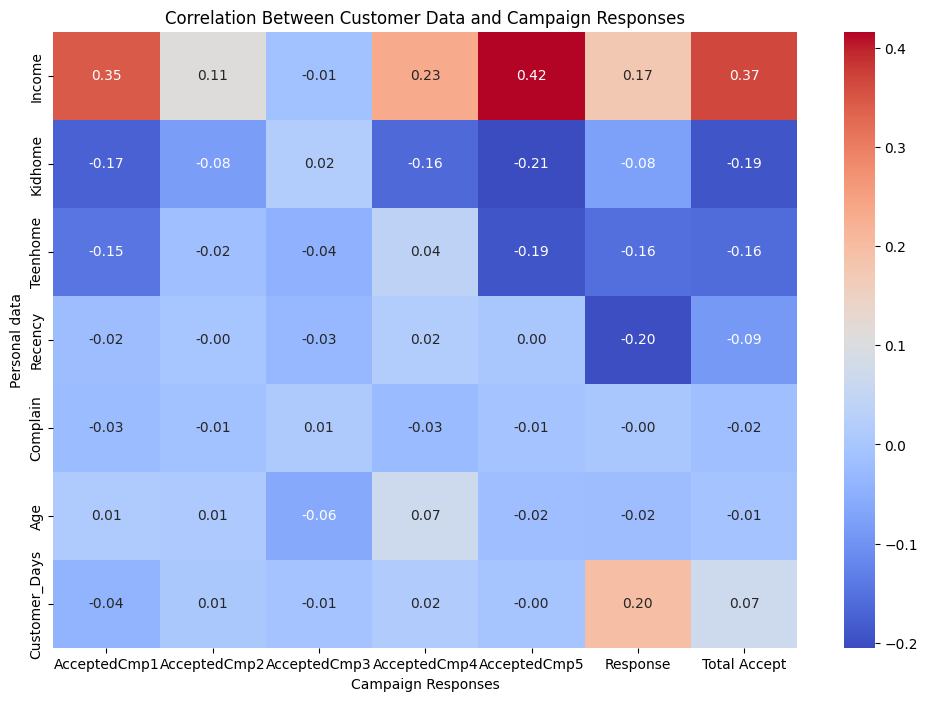

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Customer Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Personal data')
plt.show()

In [6]:
X = join[personal_data_column]
y = join["Total Accept"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of level {i}: {accuracy:.2f}")  
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of level {i}: {accuracy:.2f}")

Accuracy of level 1: 0.75
Accuracy of level 2: 0.75
Accuracy of level 3: 0.75
Accuracy of level 4: 0.72
Accuracy of level 5: 0.72
Accuracy of level 6: 0.71
Accuracy of level 7: 0.69
Accuracy of level 8: 0.70
Accuracy of level 9: 0.68
Accuracy of level 10: 0.69
Accuracy of level 11: 0.68
Accuracy of level 12: 0.66
Accuracy of level 13: 0.66
Accuracy of level 14: 0.63
Accuracy of level 15: 0.63
Accuracy of level 16: 0.63
Accuracy of level 17: 0.62
Accuracy of level 18: 0.62
Accuracy of level 19: 0.62
Accuracy of level 19: 0.75


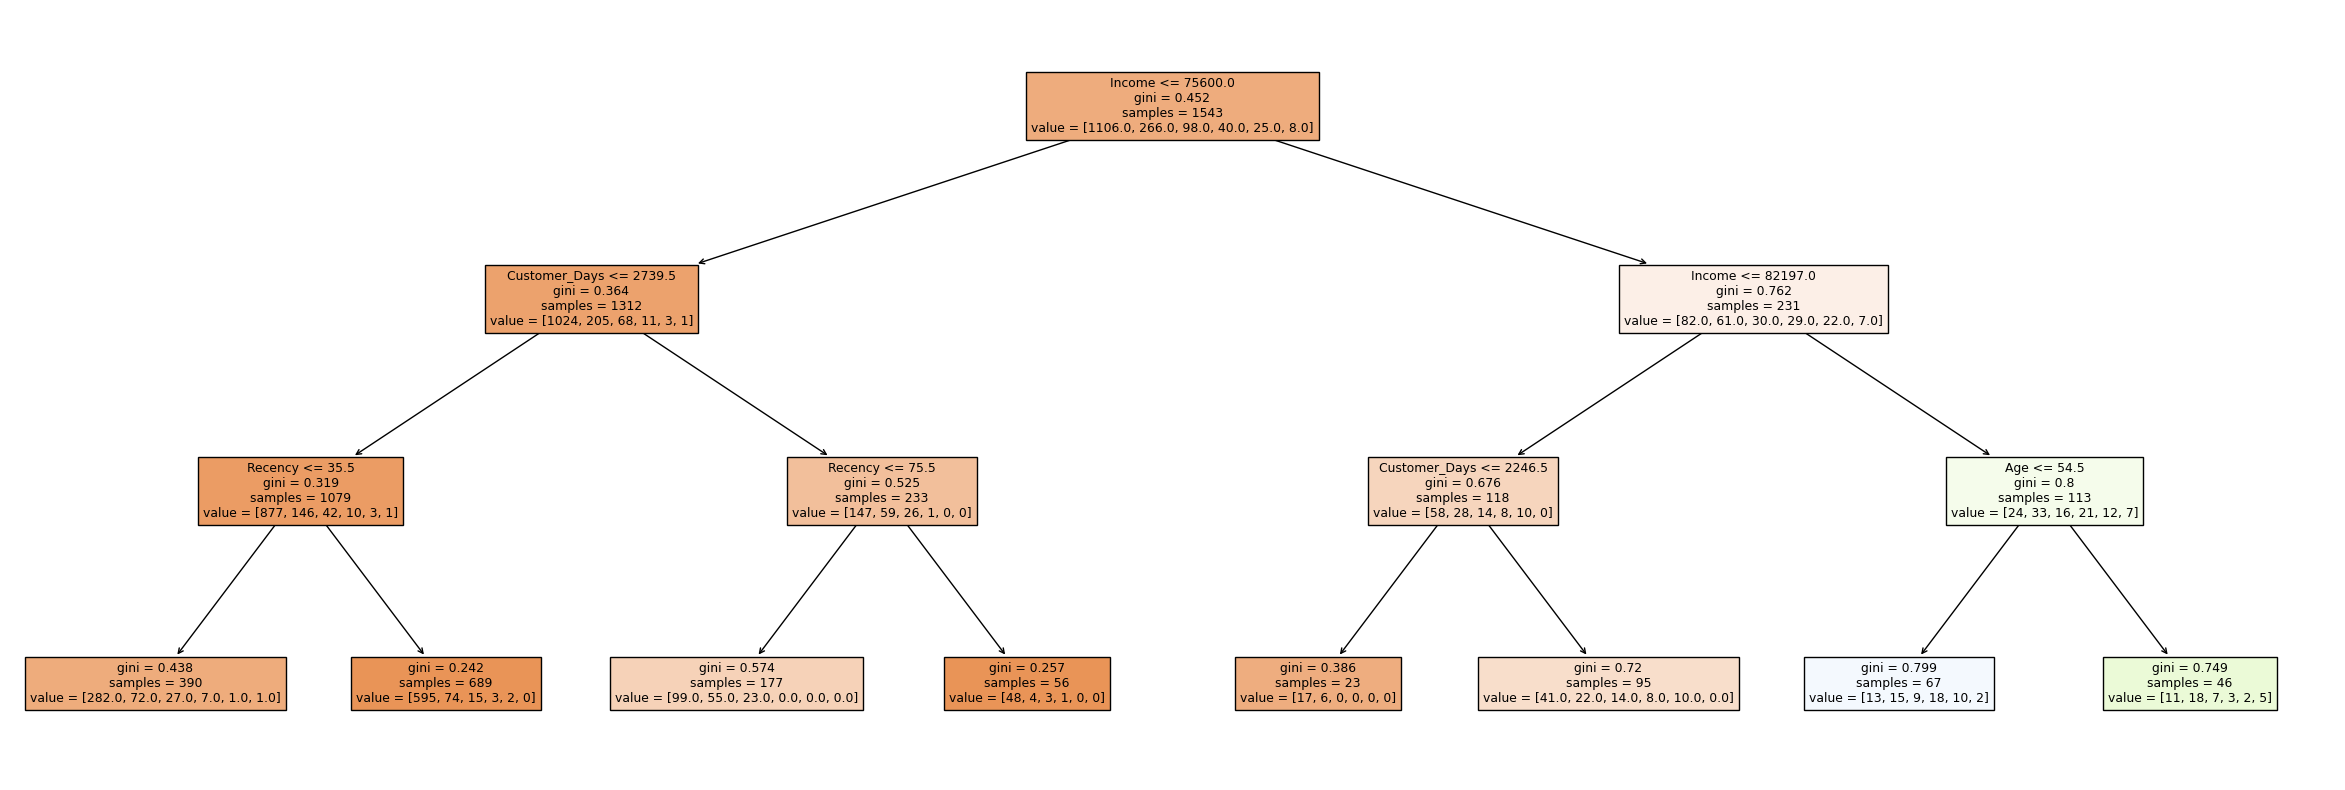

In [9]:
plt.figure(figsize=(30, 10))
p = plot_tree(clf, filled = True, feature_names = X.columns)
plt.show()


AB testing

In [10]:
from scipy.stats import ttest_ind


In [11]:
AB_raw = personal_data.filter(['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']).astype(int)
AB_test_list = ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']
AB_raw["acceptTF"] = (join["Total Accept"] >= 1).astype(int)
AB_raw

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,acceptTF
0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2200,0,1,0,0,0,0,0,1,0,0,0
2201,0,0,0,1,0,0,0,0,0,1,1
2202,1,0,0,0,0,0,0,1,0,0,1
2203,0,0,0,1,0,0,0,0,1,0,0


In [12]:

def AB_testing(data, test_column, result_column, result):
    group_a = data[data[test_column] == 0][result_column]
    group_b = data[data[test_column] == 1][result_column]

    t_stat, p_value = ttest_ind(group_a, group_b)

    result.loc[result["Tests"] == test_column, "t_stat"] = t_stat
    if p_value > 0.5:
        result.loc[result["Tests"] == test_column, "p_value"] =  - p_value
    else:
        result.loc[result["Tests"] == test_column, "p_value"] =  p_value



In [13]:

AB_result = {"Tests": ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']}
AB_result = pd.DataFrame(AB_result)
for f in AB_test_list:
    AB_testing(AB_raw, f, "acceptTF", AB_result)


AB_result

,Tests,t_stat,p_value
0,marital_Divorced,-0.936759,0.348985
1,marital_Married,1.758060,0.078876
2,marital_Single,-2.244376,0.024907
3,marital_Together,1.374527,0.169418
4,marital_Widow,-1.356357,0.175125
5,education_2n Cycle,1.542938,0.122989
6,education_Basic,2.409328,0.016063
7,education_Graduation,0.847501,0.396808
8,education_Master,0.091016,-0.927488
9,education_PhD,-3.094078,0.001999
